# FINAL STATUS PREDICTION
MUHAMMAD HANIF SUYUTHI

# DESKRIPSI

## OBJEKTIF
MEMBUAT MODEL PREDIKSI STATUS NILAI AKHIR

## PERMASALAHAN
- DIANTARA ALGORITMA YANG TELAH DI TUNING, MANAKAH ALGORITMA YANG MENGHASILKAN PREDIKSI TERBAIK?
- BERAPAKAH NILAI AKURASI PADA ALGORITMA TERSEBUT?
- BAGAIMANAKAH HASIL DARI MODEL PREDIKSI YANG KITA BUAT? 

## BATASAN
- ALGORITMA YANG DIGUNAKAN ADALAH SVM, DT, RF, DAN GBC
- FITUR YANG DIGUNAKAN ADALAH FITUR YANG DIRASA MEMILIKI NILAI KORELASI YANG TINGGI
- STATUS NILAI AKHIR BERDASARKAN DARI NILAI G3 DAN HANYA ADA DUA NILAI, "PASS" (G3 < 10) DAN "NOT PASS" (G3 >= 10)

## DATASET
DATASET DIAMBIL DARI

`https://archive.ics.uci.edu/ml/datasets/Student+Performance`



# AREA KERJA

## IMPOR PUSTAKA


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from scipy import stats


#model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluasi
from sklearn.metrics import classification_report

#save model
import json
import pickle

import warnings
warnings.filterwarnings("ignore")

## MEMUAT DATA

Data yang telah disimpan di GDrive kemudian kita muat.

In [54]:
df = pd.read_excel('/content/drive/MyDrive/Hacktiv8/student-mat.xlsx')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


Dataset ini memiliki penjelasan atribut sebagai berikut


Attributes datasets:
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

these grades are related with the course subject, Math or Portuguese:

31. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
32. G3 - final grade (numeric: from 0 to 20, output target)

Dari penjelasan diatas kita dapat melihat ada nilai numerik yang merupakan nilai Ordinal

Setelah data dimuat kita akan melihat informasi yang ada pada kolom-kolomnya

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Dari informasi yang ada tidak ada missing value didalam kolom, sehingga kita tidak akan melakukan handling missing value pada data kita



Selanjutnya kita lihat ringkasan statistik pada data kita

In [56]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## EDA

Selanjutnya kita akan melakukan eksplorasi terhadap data kita. Kita buat terlabih dahulu DataFrame khusus untuk EDA (df_EDA)

In [57]:
# df khusus EDA
df_eda=df.copy()

Pada df ini kita akan membuat kolom Status untuk melihat status nilai akhir

In [58]:
df_eda['Status']=df['G3'].apply(lambda x: 'Not Pass' if x < 10 else 'Pass')

Selanjutnya kita melihat persebaran beberapa kolom data kita

Text(0.5, 1.0, 'absen')

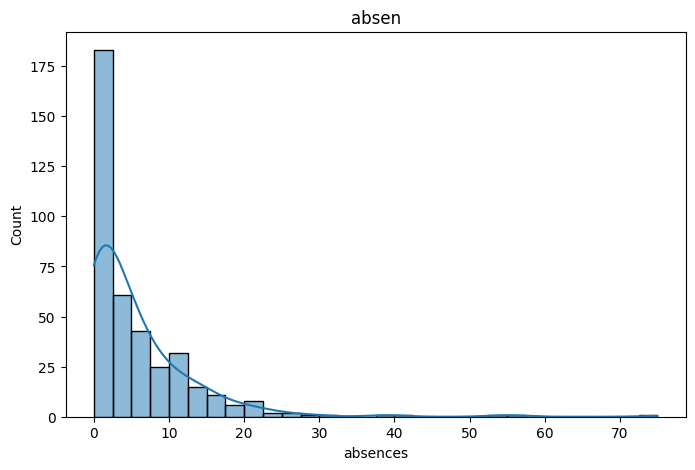

In [59]:
# persebaran data kolom absen
fig, axes = plt.subplots(figsize=(8,5))
sns.histplot(ax=axes,data=df_eda['absences'],kde=True, bins=30)
axes.set_title('absen')

Dari data terlihat bahwa banyak siswa yang absen

Text(0.5, 1.0, 'status')

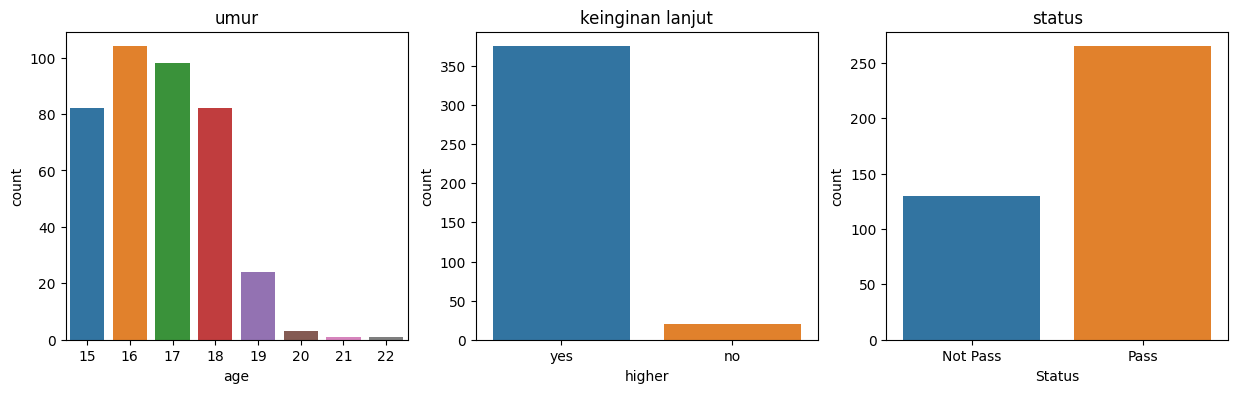

In [60]:
# persebaran data kolom umur, keinginan lanjut pendidikan, status kelulusan
fig, axes = plt.subplots(1,3, figsize=(15,4))
sns.countplot(ax=axes[0], x=df_eda["age"])
axes[0].set_title('umur')
sns.countplot(ax=axes[1], x=df_eda["higher"])
axes[1].set_title('keinginan lanjut')
sns.countplot(ax=axes[2], x=df_eda["Status"])
axes[2].set_title('status')

Dari grafik umur terlihat bahwa banyak siswa pada data kita yang berumur 18 tahun kebawah. Dari grafik terlihat bahwa sekolah pada sumber data ini memiliki range umur siswa yang besar.

Dari grafik keinginan lanjut terlihat bahwa banyak siswa yang memiliki keinginan untuk melanjutkan ke jenjang yang lebih tinggi. Dari sini dapat dikatakan bahwa siswa di sekolah tertsebut memiliki semangat yang tinggi.

Dari grafik status terlihat bahwa hampir sepertiga dari siswa tidak lulus pada nilai akhir.

Selanjutnya kita akan melihat hubungan beberapa kolom terhadap kolom status

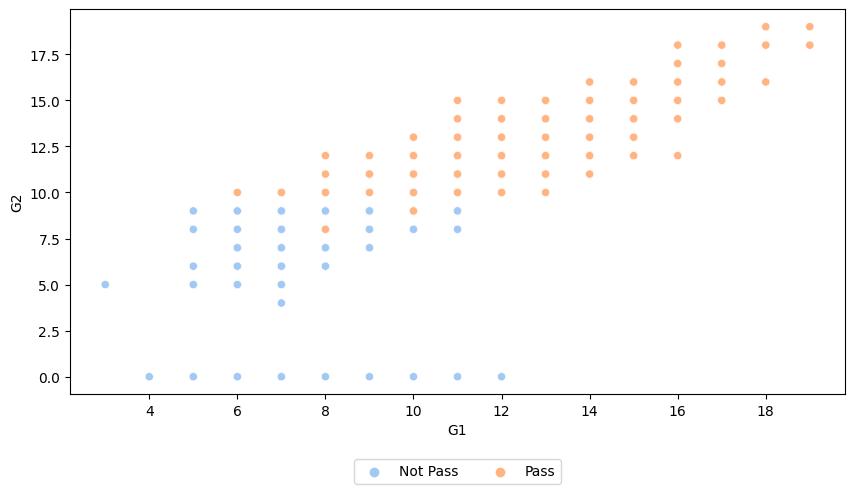

In [61]:
# hubungan G1 dan G3 terhadap Status
fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(data=df_eda, x='G1', y='G2', hue="Status",legend='full', palette='pastel')
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=5)
plt.show()

Dari grafik terlihat bahwa kebanyakan siswa yang lulus merupakan siswa yang juga lulus pada G1 dan G2 ( >= 10). Hal ini menunjukan bahwa G1 dan G2 memiliki keterkaitan yang tinggi terhadap Status

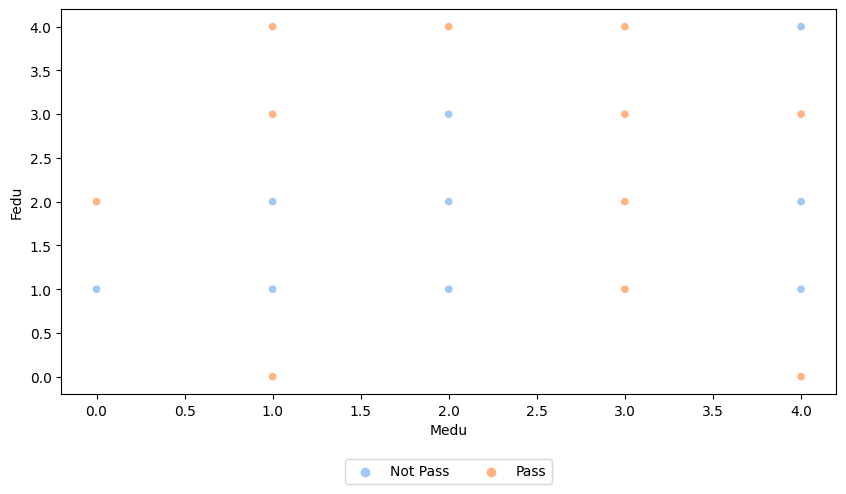

In [62]:
# hubungan pendidikan orang tua terhadap status
fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(data=df_eda, x='Medu', y='Fedu', hue="Status",legend='full', palette='pastel')
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=5)
plt.show()

Dari grafik tersebut terlihat bahwa pendidikan orang tua tidak terlalu berpengaruh pada status. Terlihat bahwa status lulus banyak terdapat ketika tingkat pendidikan orang tua berada >= 3.

Kita sinpan data eda kita untuk deployment 

In [65]:
# Menyimpan df eda untuk deployment
df_eda.to_csv('for_eda.csv', index=False)

## FEATURE ENGINEERING

Selanjutnya kita akan menyiapkan data yang akan kita pakai. Pertama kita akan memilih fitur yang dipakai.

### Fitur Selection



Kita pisahkan terlebih dahulu kolom yang berisi nilai objek dan nilai numerik

In [66]:
# pisah jenis kolom
df_obj = df.select_dtypes(include='object')
df_num = df.select_dtypes(include='int')

Tak lupa kita buat target yang mau kita pakai. Target ini bernilai 'Pass' (G3 < = 10) dan 'Not Pass' (G3 < 10) sesuai dengan nilai pad G3

In [67]:
# buat kolom target
df['Target']=df['G3'].apply(lambda x: 'Not Pass' if x < 10 else 'Pass')

In [68]:
df['Target']

0      Not Pass
1      Not Pass
2          Pass
3          Pass
4          Pass
         ...   
390    Not Pass
391        Pass
392    Not Pass
393        Pass
394    Not Pass
Name: Target, Length: 395, dtype: object

Untuk kolom numerik kita akan mencari nilai korelasi menggunakan .corr() dan melihat nilia korelasi terhadap G3. Kita akan mengambil kolom yang memiliki nilai korelasi yang besar sebagai fitur 

In [69]:
df_num.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


Sessuai dengan nilai korelasi maka kita akan menggambil kolom 'failures', 'goout', 'Medu', 'traveltime', 'Fedu', 'G1', dan 'G2'.

Selanjutnya kita akan melihat korelasi kolom objek terhadap kolom G3. Untuk kolom ini kita menggunakan nilai f dan p. Kita akan memilih nilai f yang besar dan nilia p yang kecil

In [70]:
df_new = pd.DataFrame()

for col in df_obj.columns:
    merged_df = pd.concat([df_obj[col], df_num['G3']], axis=1)
    grouped_data = merged_df.groupby(col)['G3']
    f_statistic, p_value = stats.f_oneway(*[grouped_data.get_group(group) for group in grouped_data.groups])
    df_new = df_new.append({'kolom': col, 'F': f_statistic, 'P': p_value}, ignore_index=True)

df_new


,kolom,F,P
0,school,0.798042,0.372226
1,sex,4.251814,0.039865
2,address,4.445164,0.035633
3,famsize,2.621832,0.106205
4,Pstatus,1.326927,0.250053
5,Mjob,3.754460,0.005195
6,Fjob,1.302915,0.268314
7,reason,2.079992,0.102337
8,guardian,1.590517,0.205133
9,schoolsup,2.712167,0.100385


Dari tabel kita akan menggambil nilai 'address', 'paid', 'higher','internet', dan 'romantic'. 

### Data Inference

Sebelum membagi data latih dan data uji, kita menggambil beberapa data sebagai data inference.

In [72]:
data_inf= df.sample(5,random_state=76)
data_inf

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Target
312,GP,M,19,U,GT3,T,1,2,other,services,...,5,2,2,2,4,3,13,11,11,Pass
252,GP,M,18,U,GT3,T,2,1,services,services,...,2,5,2,5,5,4,6,9,8,Not Pass
341,GP,M,18,U,GT3,T,4,4,teacher,services,...,3,3,2,2,2,0,10,10,0,Not Pass
47,GP,M,16,U,GT3,T,4,3,health,services,...,2,2,1,1,2,4,19,19,20,Pass
156,GP,M,17,R,LE3,T,1,2,other,other,...,2,2,3,3,5,8,16,12,13,Pass


Data yang tersisa akan kita pakai sebagai data model kita yang akan kita bagi menjadi data latih dan data tes.

In [73]:
df_model= df.drop(index=data_inf.index)
df_model

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Target
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Not Pass
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Not Pass
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,Not Pass
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,Pass
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,Not Pass
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,Pass


In [74]:
#reset index
df_model.reset_index(drop=True,inplace=True)
data_inf.reset_index(drop=True,inplace=True)

### Membagi Data

Selanjutnya kita akan membagi data menjadi data fitur dan data target. Sebelumn kita membagi data, kita pisahkan dulu kolom numerik dan kolom kategorik pada fitur yang kita pilih 

In [75]:
# kolom yang dipakai 
cat_cols=['address', 'paid', 'higher','internet', 'romantic']
num_cols=['failures', 'goout', 'Medu', 'traveltime', 'Fedu', 'G1', 'G2']
target=['Target']

In [76]:
# data fitur dan data target
X = pd.concat([df_model[num_cols],df_model[cat_cols]], axis=1)
y = df_model[target]

X

,failures,goout,Medu,traveltime,Fedu,G1,G2,address,paid,higher,internet,romantic
0,0,4,4,2,4,5,6,U,no,yes,no,no
1,0,3,1,1,1,5,5,U,no,yes,yes,no
2,3,2,1,1,1,7,8,U,yes,yes,yes,no
3,0,2,4,1,2,15,14,U,yes,yes,yes,yes
4,0,2,3,1,3,6,10,U,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...
385,2,4,2,1,2,9,9,U,yes,yes,no,no
386,0,5,3,2,1,14,16,U,no,yes,yes,no
387,3,3,1,1,1,10,8,R,no,yes,no,no
388,0,1,3,3,2,11,12,R,no,yes,yes,no


In [77]:
y

,Target
0,Not Pass
1,Not Pass
2,Pass
3,Pass
4,Pass
...,...
385,Not Pass
386,Pass
387,Not Pass
388,Pass


Selanjutnya kita bagi lagi X dan y menjadai data latih dan data uji

In [78]:
# membagi data latih dan data tes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# reset index
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

### Encoding

Data X pada kolom kategorik kemudian kita encoding

In [80]:
# ubah ke string
X_train[cat_cols] = X_train[cat_cols].astype(str)
X_test[cat_cols] = X_test[cat_cols].astype(str)

# encoder
encoder = OrdinalEncoder()

# encoding
X_train_encoded = encoder.fit_transform(X_train[cat_cols])
X_test_encoded = encoder.transform(X_test[cat_cols])

# gabung data
X_train_encoded = pd.concat([pd.DataFrame(X_train_encoded, columns=cat_cols), X_train[num_cols]], axis=1)
X_test_encoded = pd.concat([pd.DataFrame(X_test_encoded, columns=cat_cols), X_test[num_cols]], axis=1)


In [81]:
X_train_encoded

,address,paid,higher,internet,romantic,failures,goout,Medu,traveltime,Fedu,G1,G2
0,0.0,1.0,1.0,1.0,0.0,0,2,3,2,2,14,13
1,1.0,0.0,1.0,1.0,1.0,0,4,4,1,3,10,10
2,0.0,1.0,1.0,1.0,0.0,0,3,4,2,4,10,11
3,1.0,0.0,1.0,1.0,1.0,0,2,1,2,1,10,10
4,1.0,0.0,1.0,0.0,1.0,1,4,1,1,1,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...
307,0.0,0.0,1.0,1.0,1.0,2,4,1,1,1,8,6
308,1.0,0.0,1.0,1.0,0.0,0,3,3,1,3,16,18
309,0.0,1.0,1.0,0.0,1.0,0,2,1,1,2,15,14
310,0.0,0.0,1.0,1.0,0.0,1,4,1,3,1,8,8


## MODEL DEFINITION

Pada model ini kita menggunakan empat algoritma:
- Support Vector Machine (SVM), SVM merupakan algoritma yang cocok untuk mengatasi masalah yang komplek pada data yang tidak begitu besar
- Decision Tree (DT), DT dapat menangani data kategorikal maupun numerik tanpa memerlukan banyak persiapan data
- Random Forest (RF), RF merupakan ensemble learning yang menggunakan beberapa pohon keputusan secara bersamaan
- Gradient Boosting (GBC), GBC merupakan ensemble learning yang menggabungkan beberapa model lemah menjadi model yang kuat

Kita akan melakukan hyperparameter tuning sehingg kita pilih beberapa nilai pada hyperparameter yang akan kita tuning dan memasukannya ke dalam dictionary models

Kita juga akan melakukan cross validation dengan nilai fold sebanyak 10 Fold

In [82]:
# deklarasi scaler
scaler = StandardScaler()

# deklarasi model dan nilai hyperparameter yang akan dituning
models = {
    'svm': {
        'model': SVC(),
        'param_grid': {'svm__C': [1, 10, 100], 'svm__gamma': ['scale', 'auto']}
    },
    'dt': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'dt__max_depth': [None, 5, 10, 20]}
    },
    'rf': {
        'model': RandomForestClassifier(),
        'param_grid': {'rf__n_estimators': [100, 200, 300], 'rf__max_depth': [None, 5, 10]}
    },
    'gbc': {
        'model': GradientBoostingClassifier(),
        'param_grid': {'gbc__n_estimators': [50, 100, 150], 'gbc__learning_rate': [0.1, 0.01]}
    }
}

# deklarasi k-fold
kf=KFold(n_splits=10, shuffle=True, random_state=78)

# variabel untuk menyimpan estimator terbaik
best_estimators = {}

# variabel untuk menyimpan parameter terbaik
best_params = {}

In [83]:
#Break

## MODEL TRAINING

Pada tahap ini kita akan mengabungkan prose scaling dan deklarasi algoritma dengan pipeline. Kita juga akan melakukan hyperparameter tuning dengan gridsearchCV.

gridseach akan mencari hyperparameter terbaik tiap algoritma dan menghasilkan hyperparameter terbaik diantara nilai hyperparameter yang kita tentukan.

gridseach kemudian melakukan fit terhadap data latih kita

Hyperparameter tuning estimator terbaik akan disimpan ke variabel best_estimator dan parameter terbaik tiap algoritma akan disimpan ke variabel best_params.


In [84]:
# hyperparameter tuning
for model_name, model_info in models.items():

    pipeline = Pipeline([
        ('scaler', scaler),
        (model_name, model_info['model'])
    ])
    

    grid_search = GridSearchCV(pipeline, model_info['param_grid'], cv=kf, n_jobs=-1)
    

    grid_search.fit(X_train_encoded, y_train)
    

    best_estimators[model_name] = grid_search.best_estimator_
    

    best_params[model_name] = grid_search.best_params_

    y_train_pred = grid_search.predict(X_train_encoded)
    

    print("Model:", model_name.upper())
    print("Classification Report (Data Latih):")
    print(classification_report(y_train, y_train_pred))
    print("---------------------------------------")
    

Model: SVM
Classification Report (Data Latih):
              precision    recall  f1-score   support

    Not Pass       1.00      1.00      1.00       107
        Pass       1.00      1.00      1.00       205

    accuracy                           1.00       312
   macro avg       1.00      1.00      1.00       312
weighted avg       1.00      1.00      1.00       312

---------------------------------------
Model: DT
Classification Report (Data Latih):
              precision    recall  f1-score   support

    Not Pass       0.94      0.94      0.94       107
        Pass       0.97      0.97      0.97       205

    accuracy                           0.96       312
   macro avg       0.95      0.95      0.95       312
weighted avg       0.96      0.96      0.96       312

---------------------------------------
Model: RF
Classification Report (Data Latih):
              precision    recall  f1-score   support

    Not Pass       1.00      1.00      1.00       107
        Pass      

Dari Classification Report terlihat bahwa hanya DT yang memilliki nilai yang jelek.

In [85]:
# parameter terbaik
best_params

{'svm': {'svm__C': 100, 'svm__gamma': 'scale'},
 'dt': {'dt__max_depth': 5},
 'rf': {'rf__max_depth': None, 'rf__n_estimators': 300},
 'gbc': {'gbc__learning_rate': 0.1, 'gbc__n_estimators': 150}}

## MODEL EVALUATION

Selanjutnya kita akan mengevaluasi algoritma kita

In [94]:
# evaluasi model

for model_name, model_info in models.items():

    best_estimator = best_estimators[model_name]
    

    y_test_pred = best_estimator.predict(X_test_encoded)
    
    
    print("Model:", model_name.upper())
    print("Classification Report (Data Tes):")
    print(classification_report(y_test, y_test_pred))
    print("---------------------------------------")

Model: SVM
Classification Report (Data Tes):
              precision    recall  f1-score   support

    Not Pass       0.68      0.81      0.74        21
        Pass       0.92      0.86      0.89        57

    accuracy                           0.85        78
   macro avg       0.80      0.83      0.82        78
weighted avg       0.86      0.85      0.85        78

---------------------------------------
Model: DT
Classification Report (Data Tes):
              precision    recall  f1-score   support

    Not Pass       0.70      0.76      0.73        21
        Pass       0.91      0.88      0.89        57

    accuracy                           0.85        78
   macro avg       0.80      0.82      0.81        78
weighted avg       0.85      0.85      0.85        78

---------------------------------------
Model: RF
Classification Report (Data Tes):
              precision    recall  f1-score   support

    Not Pass       0.73      0.90      0.81        21
        Pass       0.96 

Dari hasil evaluasi terlihat bahwa algoritma RF memiliki nilai Classification Report yang bagus dari seluruh algoritma yang kita pilih.

Matriks Evaluasi:
- Akurasi, Akurasi yang besar menandakan model secara keseluruhan dapat mengklasifikasikan data dengan benar
Nilai akurasi 0.88 berarti algoritma ini mampu untuk menebak 88% nilai benar dari seluruh kelas.

- Recall, Recall yang tinggi menandakan bahwa model cenderung tidak melewatkan contoh positif.
  - Recall  "Not Pass" adalah 0.90, yang berarti model dapat mengklasifikasikan sekitar 90% dari semua data "Not Pass".
  - Recall  "Pass" adalah 0.88, yang berarti model dapat mengklasifikasikan sekitar 88% dari semua data "Pass".

- Precision, Precision yang tinggi menandakan bahwa model cenderung membuat sedikit kesalahan dengan memprediksi kelas yang benar
  - Precision "Not Pass" adalah 0.73, yang berarti semua prediksi "Not Pass" yang dibuat oleh model, sekitar 73% adalah benar.
  - Precision "Pass" adalah 0.96, yang berarti semua prediksi "Pass" yang dibuat oleh model, sekitar 96% adalah benar.


Dari hasil tersebut, algoritma yang kita pilih untuk model kita adalah algoritma RF.

## MODEL SAVING

Selanjutnya kita simpan model yang telah kita bangun

In [88]:
# estimator rf terbaik 
best_rf_estimator = best_estimators['rf']

In [90]:
# model dan fe
with open('best_model.pkl', 'wb') as file_1:
  pickle.dump(best_estimator, file_1)

with open('encoder.pkl', 'wb') as file_2:
  pickle.dump(encoder, file_2)

with open('best_rf.pkl', 'wb') as file_3:
  pickle.dump(best_rf_estimator, file_3)


#list num dan cat
with open('target.txt', 'w') as file_4:
  json.dump(target, file_4)

with open('num_col.txt', 'w') as file_5:
  json.dump(num_cols, file_5)

with open('cat_col.txt', 'w') as file_6:
  json.dump(cat_cols, file_6)



## MODEL INFERENCE

Model yang telah kita bangun kemudian kita coba dengan data inference

In [91]:
# bagi data fitur dan data target
X_inf = pd.concat([data_inf[num_cols], data_inf[cat_cols]], axis=1)
y_inf = data_inf[target]

#encoding data inf
X_inf_encoded = pd.DataFrame(encoder.transform(X_inf[cat_cols]), columns=cat_cols)

# gabung data
X_inf_encoded = pd.concat([X_inf_encoded, X_inf[num_cols]], axis=1)



In [92]:
X_inf

,failures,goout,Medu,traveltime,Fedu,G1,G2,address,paid,higher,internet,romantic
0,1,2,1,1,2,13,11,U,no,yes,yes,no
1,1,5,2,1,1,6,9,U,no,no,yes,no
2,1,3,4,1,4,10,10,U,no,yes,yes,no
3,0,2,4,1,3,19,19,U,no,yes,yes,no
4,0,2,1,1,2,16,12,R,no,yes,no,no


In [95]:
# klasifikasi
for model_name, model_info in models.items():
    
    best_estimator = best_estimators[model_name]
    
    
    y_inf_pred = best_estimator.predict(X_inf_encoded)
    
    y_inf['Pred']=y_inf_pred

    
    print("Model:", model_name.upper())
    print("Hasil :")
    print(y_inf)
    print("---------------------------------------")

Model: SVM
Hasil :
     Target      Pred
0      Pass      Pass
1  Not Pass  Not Pass
2  Not Pass      Pass
3      Pass      Pass
4      Pass      Pass
---------------------------------------
Model: DT
Hasil :
     Target      Pred
0      Pass      Pass
1  Not Pass  Not Pass
2  Not Pass      Pass
3      Pass      Pass
4      Pass      Pass
---------------------------------------
Model: RF
Hasil :
     Target      Pred
0      Pass      Pass
1  Not Pass  Not Pass
2  Not Pass      Pass
3      Pass      Pass
4      Pass      Pass
---------------------------------------
Model: GBC
Hasil :
     Target      Pred
0      Pass      Pass
1  Not Pass  Not Pass
2  Not Pass      Pass
3      Pass      Pass
4      Pass      Pass
---------------------------------------


Dari perbandingan prediksi dan aktual terlihat bahwa semua algoritma berhasil menebak benar 4 data dari 5 data inference

# KESIMPULAN



## Model Analysis
- Dari berbagai algoritma yang dipilih, algortima Random Forest (RF) memiliki nilai akurasi, presisi, recall, dan F1 yang baik dibandingkan algoritma yang lain
- Nilai parameter terbaik untuk RF pada model kita adalah 'max_depth': None dan 'n_estimators': 300


## Overall Analysis
- Dari EDA bisa kita simpulkan:
  - Siswa pada sekolah tersebut memiliki range umur yang jauh dan memiliki motivasi untuk melanjutkan jenjang yang lebih tinggi 
  - Nilai G1 dan G2 memiliki korelasi yang besar terhadap nilai akhir
  - Pendidikan orang tua sedikit berpengaruh pada nilai akhir

- Pada data model kita, algoritma Random Forest (RF) yang telah di Hyperparameter Tuning memiliki hasilakurasi yang bagus dibandingkan dengan algortima lainnya (SVM, DT, dan GBC) 

- Model kita memiliki nilai akuraasi 88%, angka ini menunjukan model kita sudah cukup baik dalam memprediksi status nilai akhir

- Fitur G1 dan G2 pada model kita masih memiliki korelasi yang besar terhadap target kita


# SARAN

- Ditambahkan fitur yang mempunyai nilai korelasi negatif agar sedikit mengurangi pengaruh korelasi G1 dan G2 terhadap target